In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/archive/parkinsons_disease_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [5]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')

In [7]:
# Veri Setini Bağımlı ve Bağımsız Niteliklere Ayırmak
X = df.iloc[:, 1:33].values
X[0:5]

array([[8.50000000e+01, 0.00000000e+00, 3.00000000e+00, 1.00000000e+00,
        1.96198780e+01, 0.00000000e+00, 5.10824061e+00, 1.38065992e+00,
        3.89396914e+00, 9.28319445e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.29000000e+02, 6.00000000e+01, 2.22842278e+02, 1.48125623e+02,
        3.78677764e+01, 3.37307114e+02, 6.45871295e+00, 2.91812893e+01,
        1.57242719e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.50000000e+01, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        1.62473392e+01, 1.00000000e+00, 6.02764803e+00, 8.40980405e+00,
        8.51342825e+00, 5.60246951e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.63000000e+02, 7.60000000e+01, 2.10501133e+02, 1.53756463e+02,
        7.72281169e+01, 2.64635521e+02, 3.73067027e+01, 1.23326

In [8]:
# Convert the NumPy array 'X' back to a Pandas DataFrame to use .head()
import pandas as pd

X_df = pd.DataFrame(X) #Create a pandas DataFrame from the numpy array X
print(X_df.head()) # Now you can use .head()

     0    1    2    3          4    5         6         7         8   \
0  85.0  0.0  3.0  1.0  19.619878  0.0  5.108241  1.380660  3.893969   
1  75.0  0.0  0.0  2.0  16.247339  1.0  6.027648  8.409804  8.513428   
2  70.0  1.0  0.0  0.0  15.368239  0.0  2.242135  0.213275  6.498805   
3  52.0  0.0  0.0  0.0  15.454557  0.0  5.997788  1.375045  6.715033   
4  87.0  0.0  0.0  1.0  18.616042  0.0  9.775243  1.188607  4.657572   

         9   ...         22         23        24   25   26   27   28   29  \
0  9.283194  ...   6.458713  29.181289  1.572427  1.0  0.0  0.0  0.0  0.0   
1  5.602470  ...  37.306703  12.332639  4.787551  0.0  1.0  0.0  1.0  0.0   
2  9.929824  ...  67.838170  29.927783  2.130686  1.0  0.0  0.0  0.0  1.0   
3  4.196189  ...  52.964696  21.304268  3.391288  1.0  1.0  1.0  0.0  0.0   
4  9.363925  ...  21.804880   8.336364  3.200969  0.0  0.0  0.0  1.0  0.0   

    30   31  
0  0.0  0.0  
1  1.0  0.0  
2  0.0  1.0  
3  0.0  1.0  
4  1.0  0.0  

[5 rows x 32 column

In [9]:
y = df.iloc[:, 33].values
y[0:5]

array([0, 1, 1, 1, 0])

​​Veriyi Eğitim ve Test Olarak Ayırmak

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print("Train set:",X_train.shape, y_train.shape)
print("Test set:",X_test.shape, y_test.shape)

Train set: (1578, 32) (1578,)
Test set: (527, 32) (527,)




*   random_state=0 parametresi, farklı bir başlangıç durumu belirler. Bu, her seferinde farklı bir veri bölümü yapılması için kullanılır.
*   random_state=4 parametresi, rastgele sayı üretecinin başlangıç durumunu belirler. Bu, her seferinde aynı şekilde veri bölümü yapılması için kullanılır.



Normalizasyon


In [11]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

SVM ile çalışırken, modelin genelleme performansını artırır ve daha iyi sonuçlar elde etmek için eğitim ve test seti olarak ayırdıktan sonra ayrı ayrı ölçeklendirmek en uygundur.

***SVM Modeli Oluşturmak ve Eğitmek***

In [12]:
from sklearn.svm import SVC
classifier = SVC(probability=True)
classifier.fit(X_train, y_train)

SVC(probability=True)

***Tahmin Yapma Seti***

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[139  50]
 [ 32 306]]


In [15]:
from sklearn import metrics
print("Eğitim verisi doğruluğu:", metrics.accuracy_score(y_train,classifier.predict(X_train)))
print("Test verisi doğruluğu:",metrics.accuracy_score(y_test,y_pred))

Eğitim verisi doğruluğu: 0.9366286438529785
Test verisi doğruluğu: 0.8444022770398482


In [16]:
# Karışıklık matrisinden metrikleri hesapla
TN, FP, FN, TP = cm.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Duyarlılık (Sensitivity):", sensitivity)
print("Özgüllük (Specificity):", specificity)


Duyarlılık (Sensitivity): 0.9053254437869822
Özgüllük (Specificity): 0.7354497354497355


In [17]:
f1 = f1_score(y_test, y_pred)
print("F1 Skoru:", f1)

F1 Skoru: 0.8818443804034583


In [20]:
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.6545146383972114


AUC: 0.9109295263141416


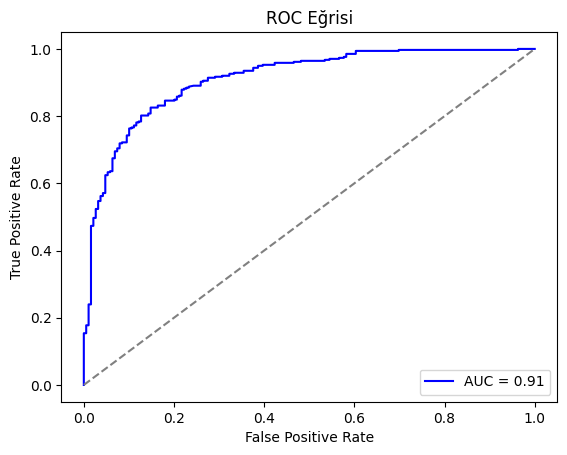

In [21]:
y_proba = classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
print("AUC:", auc)

# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77       189
           1       0.86      0.91      0.88       338

    accuracy                           0.84       527
   macro avg       0.84      0.82      0.83       527
weighted avg       0.84      0.84      0.84       527



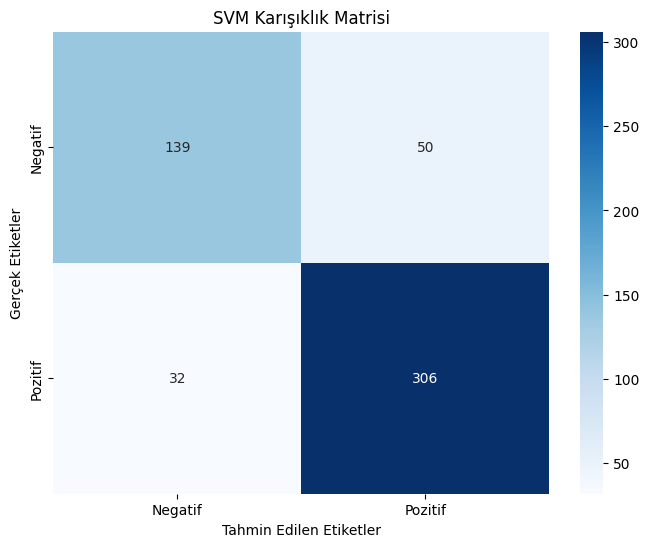

In [23]:
# Tahminleri oluştur
y_pred = classifier.predict(X_test)

# Karışıklık matrisini hesapla
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('SVM Karışıklık Matrisi')
plt.show()